# Segmentación de imágenes usando K-Means con Scikit-Learn y OpenCV

## K-Means usando SkLearns

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [ ]:
%cd /content/drive/MyDrive/Computer_Vision

image = cv2.imread('loro.jpg')

/content/drive/MyDrive/Computer_Vision


In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

pixels = image.reshape((-1, 3))

num_clusters = 5

kmeans = KMeans(n_clusters=num_clusters)

kmeans.fit(pixels)

labels = kmeans.labels_

centers = np.uint8(kmeans.cluster_centers_)
segmented_image1 = centers[labels].reshape(image.shape)

## K-Means usando OpenCV

In [ ]:
pixels = image.reshape((-1, 3)).astype(np.float32)

num_clusters = 5

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

_, labels, centers = cv2.kmeans(pixels, num_clusters, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)

segmented_image2 = centers[labels.flatten()].reshape(image.shape)

## Comparación

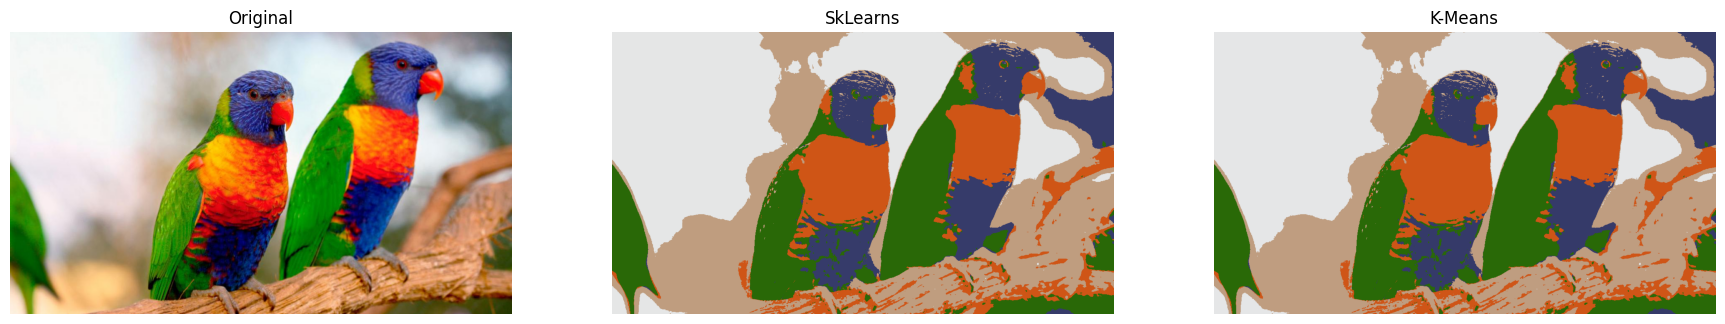

In [ ]:
plt.figure(figsize=(22, 11))
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title("Original")
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(segmented_image1)
plt.title("SkLearns")
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(segmented_image2)
plt.title("K-Means")
plt.axis('off')
plt.show()